# TESLA INC (TSLA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
from utils.TechAnalysis import *

In [2]:
## Initializations
stock = 'TSLA'
date_end = last_T(stock, 'data').strftime('%Y-%m-%d')

In [3]:
## Load data and compute indicators:
data = pd.read_csv(os.path.join('data','{}.csv'.format(stock)), 
                 index_col='Date', parse_dates=True, na_values=['NaN'])

# Bollinger Bands
data['rolling_mean'], data['upper_band'], data['lower_band'] = bollinger_bands(data, price='Close', window=20, std=2) 
# Bollinger %B Value
data['%B'] = percB(data, price='Close')
# Stochastic Oscillator
data['%K'], data['%D'] = stocastic(data, price='Close', mode='slow', window=[14, 3, 3])
# RSI
data['RSI'] = RSI(data, price='Close', window=14)
# Volume Moving Average
data['Vol-MA'] = data['Volume'].rolling(window=25).mean()
# Moving Average over 50 periods
data['MA50'] = data['Close'].rolling(window=50).mean()
# Moving Average over 200 periods
data['MA200'] = data['Close'].rolling(window=200).mean()

### 1 Year Chart

In [4]:
inp = '1Y'  
date_start, date_end = timescale(inp, date_end)
df = reshape_df(data, date_start, date_end)

## from datetime to index for plotting
df_BB = indexTime(df[['rolling_mean','upper_band','lower_band']])  
df_B = indexTime(df['%B'])
df_KD = indexTime(df[['%K', '%D']])
df_RSI = indexTime(df[['RSI']])
df_MA = indexTime(df[['MA50','MA200']])

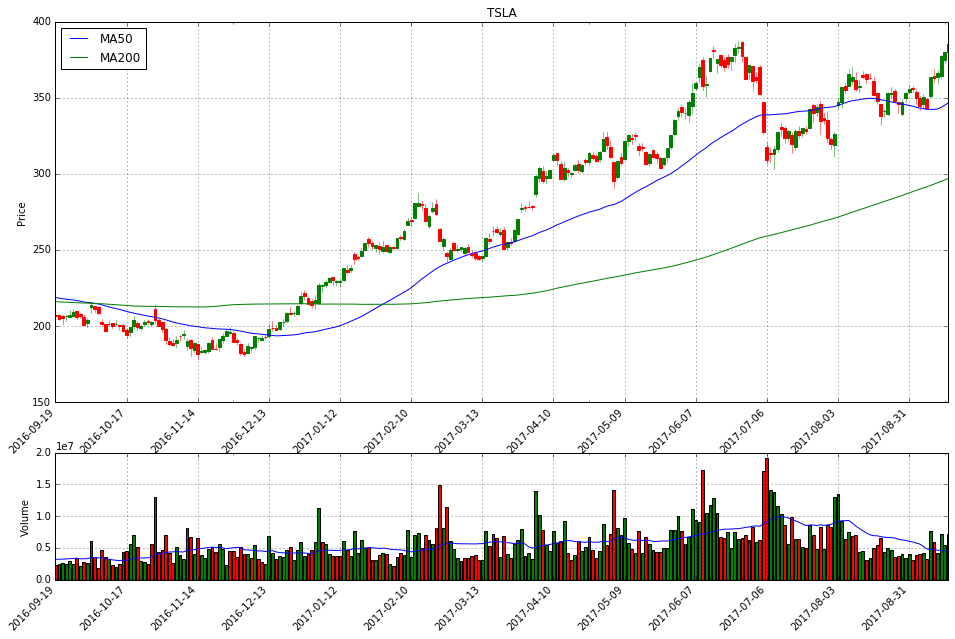

In [5]:
## Plot
fig, ax = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, sharex=True, figsize=(16,10)) 
# Subplot 1: Candlestick
ndays, date_strings, p1 = plot_candlestick(df, ax[0], price='Close', fmt='%Y-%m-%d', width=0.8)
# Subplot 1: Moving Average
df_MA.plot(ax=ax[0], legend=True)
# Subplot 2: Volumes
plot_Volume(df, ax[1])
set_plot_properties(ax, ndays, date_strings, stock, freq=20)

### Short-Term Chart

In [6]:
inp = '6M'   
date_start, date_end = timescale(inp, date_end)
df = reshape_df(data, date_start, date_end)

## from datetime to index for plotting
df_BB = indexTime(df[['rolling_mean','upper_band','lower_band']])  
df_B = indexTime(df['%B'])
df_KD = indexTime(df[['%K', '%D']])
df_RSI = indexTime(df[['RSI']])
df_MA = indexTime(df[['MA50','MA200']])

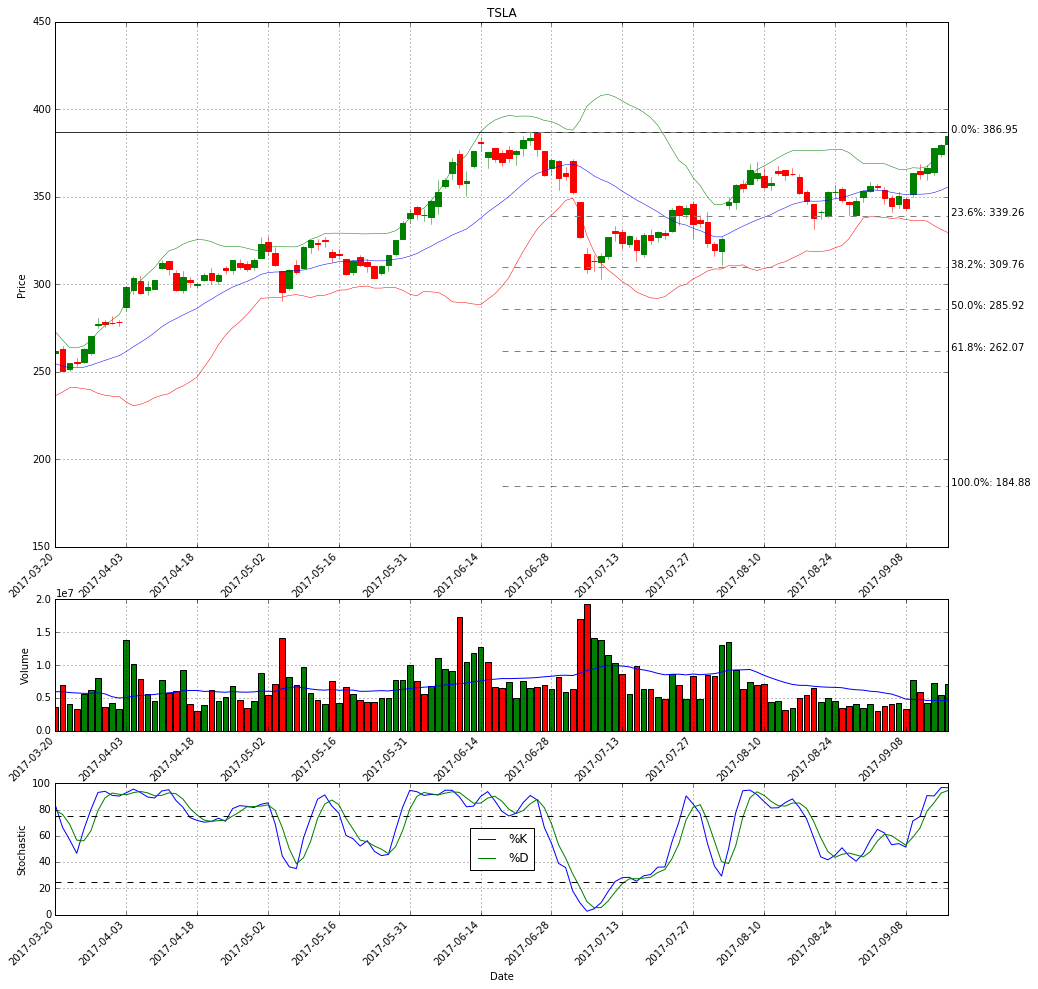

In [7]:
## Plot
fig, ax = plt.subplots(3,1, gridspec_kw = {'height_ratios':[4, 1, 1]}, sharex=True, figsize=(16,16)) 
# Subplot 1: Candlestick
ndays, date_strings, p1 = plot_candlestick(df, ax[0], price='Close', fmt='%Y-%m-%d', width=0.8)
# Subplot 1: Bollinger Bands
df_BB.plot(ax=ax[0], linewidth=0.5, legend=False)
ax[0].axhline(y=df.ix['2017-06-26']['High'], color='black', alpha=0.8)
fibonacci(data.ix['2017-06-26']['High'], data.ix['2016-12-02']['High'], ax[0], df, xmin=0.5, linewidth='1', linestyle='--')

# Subplot 2: Volumes
plot_Volume(df, ax[1])
# Subplot 3: Stochastic Oscillator
plot_index(df_KD, ax=ax[2], ylabel='Stochastic', lower_band=25.0, higher_band=75.0)
set_plot_properties(ax, ndays, date_strings, stock, freq=10)

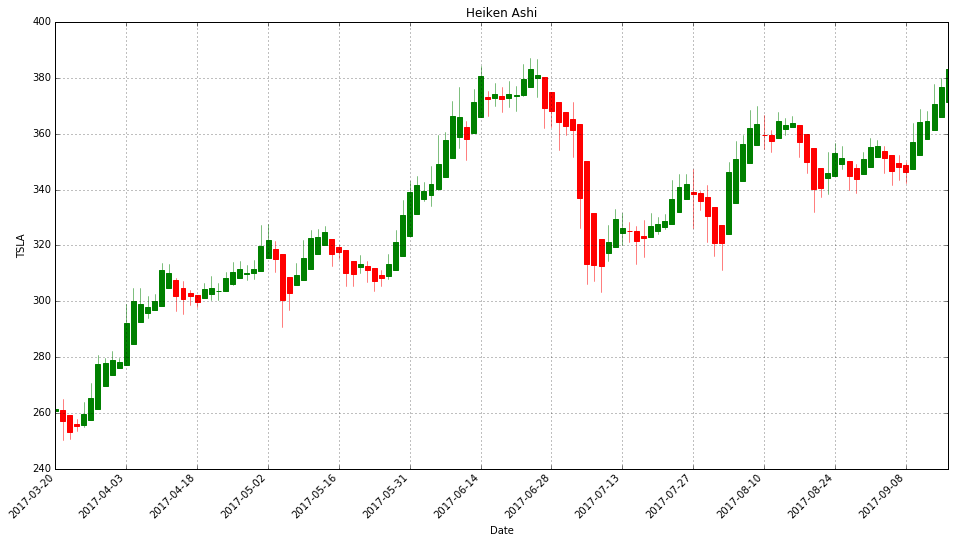

In [8]:
# Heiken Ashi Chart
fig, ax1 = plt.subplots(figsize=(16, 8))
ndays, date_strings, p1 = plot_HeikenAshi(df, ax1, price='Close', fmt='%Y-%m-%d', width=0.7)
set_plot_properties(ax1, ndays, date_strings, stock, freq=10)